In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
#Read the dataset
df = pd.read_csv("whd_whisard.csv",index_col = 'case_id',)

/Users/leiao/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,...,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
case_id,,,,,,,,,,,,,,,,,,,,,
1428484,Reliant Energy,"Reliant Energy Retail Services, LLC",1000 Main,Houston,TX,77002.0,9310,State Generation and Distribution of Electric ...,0,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
1784005,Healthcare Services Group at Westwood Center,"Healthcare Services Group, Inc.",298 Main Street,Keene,NH,3431.0,967,Local Nursing Homes,1,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2016-06-11 02:22:25 EDT
1460300,Central Avenue Bakery,"Central Avenue Bakery, Inc.",679 Central Avenue,Pawtucket,RI,2861.0,311811,Retail Bakeries,4,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
1294821,Gallagher Services,Catholic Cherities,2520 Pot Spring Road,Lutherville Timonium,MD,21093.0,9690,Local Group Homes for Mentally and Physically ...,0,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
1437099,Dragon Dynasty Oriental Mart,NaN,2299 South Ridgewood Avenue,Daytona Beach,FL,32119.0,42449,Other Grocery and Related Products Merchant Wh...,0,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST


## 1. Find out what are the top ten New York state employers with the most number of violations for H1A, H1B, H2A and H2B and how much money these employers were penalized for in total for these violations. 

In [4]:
#According to the data dictionary, st_cd is the column for state names, find the values:
df.st_cd.value_counts().head()

TX    38350
CA    26324
FL    25343
NY    20051
PA    13462
Name: st_cd, dtype: int64

In [5]:
#Create a new dataset for New York State, look at the first 5 columns
df_NY = df[df.st_cd == "NY"]
df_NY.head()

,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,...,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
case_id,,,,,,,,,,,,,,,,,,,,,
1740451,AG Kitchen,72ND & Columbus Restaurant LLC,269 Columbus Ave,New York,NY,10023.0,722110,Full-Service Restaurants,24,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2016-06-11 02:22:25 EDT
1299674,Fine Fare,Tem Food Corp,42 Avenue C,New York,NY,10009.0,44511,Supermarkets and Other Grocery (except Conveni...,16,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST
1801519,Mikado Japanese Restaurant,"Mikado Restaurant, Inc.",7 South St.,Glens Falls,NY,12801.0,722110,Full-Service Restaurants,1,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2017-03-14 01:00:03 EDT
1802025,Chicken Kebab,"Chicken Kebab, Inc.",92 Mineola Avenue,Roslyn Heights,NY,11577.0,722110,Full-Service Restaurants,0,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2017-03-14 01:00:03 EDT
1662834,Nesbitt Fruit Farms,Steven J. Nesbitt,1051 Wilson Rd.,Waterport,NY,14571.0,111331,Apple Orchards,0,0.0,...,0.0,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST


In [6]:
#Create a new dataframe to include New York employers' H1A, H1B, H2A and H2B violations and penalties
df_NY = df_NY[['trade_nm','legal_name','h1a_violtn_cnt','h1b_violtn_cnt','h2a_violtn_cnt','h2b_violtn_cnt','cmp_assd_cnt']]

In [7]:
df_NY.shape

(20051, 7)

In [8]:
df_NY.head()

,trade_nm,legal_name,h1a_violtn_cnt,h1b_violtn_cnt,h2a_violtn_cnt,h2b_violtn_cnt,cmp_assd_cnt
case_id,,,,,,,
1740451,AG Kitchen,72ND & Columbus Restaurant LLC,0,0,0,0,0.0
1299674,Fine Fare,Tem Food Corp,0,0,0,0,0.0
1801519,Mikado Japanese Restaurant,"Mikado Restaurant, Inc.",0,0,0,0,0.0
1802025,Chicken Kebab,"Chicken Kebab, Inc.",0,0,0,0,0.0
1662834,Nesbitt Fruit Farms,Steven J. Nesbitt,0,0,0,0,0.0


### (1) H1A: No H1A violations in New York (Registered nurses for temporary employment)

In [9]:
#Sort H1A violations in New York from most to least
df_NY.sort_values(by='h1a_violtn_cnt', ascending=False).head(10)

,trade_nm,legal_name,h1a_violtn_cnt,h1b_violtn_cnt,h2a_violtn_cnt,h2b_violtn_cnt,cmp_assd_cnt
case_id,,,,,,,
1740451,AG Kitchen,72ND & Columbus Restaurant LLC,0,0,0,0,0.0
1620037,Jones & Gifford Site,Chautauqua Co Chapter NYSARC Inc.,0,0,0,0,0.0
1730230,ARC Enterprises,"Rockland County Chapter NYSARC, Inc.",0,0,0,0,0.0
1730151,Demay Labor,Demay Labor Inc.,0,0,0,0,0.0
1718987,FaJas Salome,Centro de Fajas La Belleza Es Tuya Inc.,0,0,0,0,0.0
1626610,Marvel Cleaning Corp,Marvel Cleaning Corp,0,0,0,0,0.0
1629047,"GATEWAY COMMUNITY INDUSTRIES, INC.","GATEWAY COMMUNITY INDUSTRIES, INC.",0,0,0,0,0.0
1629044,Drako Cleaning Corp,Drako Cleaning Corp,0,0,0,0,0.0
1626448,"Alutiiq Global Solutions, LLC","Alutiiq Global Solutions, LLC",0,0,0,0,0.0


### (2) H1B: The following 10 New York employers have the most number of violations H1B violations (Speciality Occupations).

In [10]:
#Sort H1B violations in New York from most to least, find out the top 10 employers
df_NY_h1b = df_NY.sort_values(by='h1b_violtn_cnt', ascending=False)
df_NY_h1b.head(10)

,trade_nm,legal_name,h1a_violtn_cnt,h1b_violtn_cnt,h2a_violtn_cnt,h2b_violtn_cnt,cmp_assd_cnt
case_id,,,,,,,
1489138,"Sriven Infosys, Inc.","Sriven Infosys, Inc.",0,277,0,0,90000.0
1493658,"Sriven Systems, Inc","Sriven Systems, Inc",0,167,0,0,0.0
1422815,"Advanced Professional Marketing, Inc.","Advanced Prfessional Marketing, Inc.",0,156,0,0,0.0
1485634,"Lambents Group, Inc.","Lambents Group, Inc.",0,100,0,0,95400.0
1675982,New York University School of Medicine,New York University School of Medicine,0,79,0,0,0.0
1757555,Jean Martin Inc.,Jean Martin Inc.,0,57,0,0,0.0
1553997,"Rudell & Associates, Inc.","Rudell & Associates, Inc.",0,55,0,0,83250.0
1857463,Open Systems Technologies,Baha Industries Corp.,0,52,0,0,0.0
1842310,Jean Martin,Jean Martin Inc,0,45,0,0,182110.5


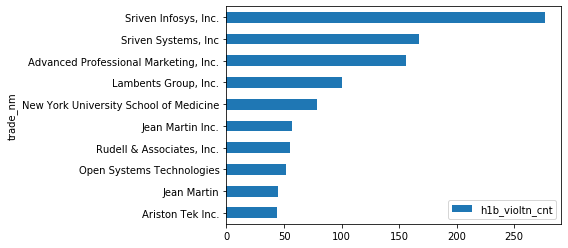

In [11]:
ax = df_NY_h1b.head(10).plot.barh(x='trade_nm', y='h1b_violtn_cnt').invert_yaxis()

### (3) H2A: The following 10 New York employers have the most number of violations H2A violations (Seasonal Agricultural Workers).

In [12]:
#Sort H2A violations in New York from most to least, find out the top 10 employers
df_NY_h2a = df_NY.sort_values(by='h2a_violtn_cnt', ascending=False)
df_NY_h2a.head(10)

,trade_nm,legal_name,h1a_violtn_cnt,h1b_violtn_cnt,h2a_violtn_cnt,h2b_violtn_cnt,cmp_assd_cnt
case_id,,,,,,,
1803778,Forking Paths Vineyards Inc. and Assoc.,Forking Paths Vineyards Inc. and Associates,0,0,180,0,40800.0
1861803,Cahoon Farms,"Cahoon Farms, Inc.",0,0,161,0,846.0
1841541,Lakeview Orchards,"Lakeview Orchards, Inc.",0,0,122,0,635.0
1495474,Pavero Cold Storage,Pavero Cold Storage Corp.,0,0,121,0,4070.0
1693615,"Bland Farms Production and Packing, LLC","Bland Farms, LLC",0,0,112,0,19944.0
1422522,Schreiber Orchards,"Schreiber Orchards, Inc.",0,0,94,0,9950.0
1385048,Kurt Weiss Greenhouses,"Kurt Weiss Greenhouses, Inc.",0,0,93,0,0.0
1813481,Intergrow Greenhouses Inc.,"Intergrow Greenhouses, Inc.",0,0,90,0,1955.4
1707619,Yonder Farm,"Yonder Fruit Farm, Inc.",0,0,87,0,54450.0


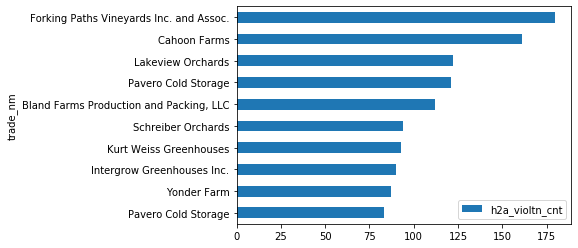

In [13]:
ax = df_NY_h2a.head(10).plot.barh(x='trade_nm', y='h2a_violtn_cnt').invert_yaxis()

### (4) H2B: The following 10 New York employers have the most number of violations H2B violations (Temporary Non-Agricultural Work).

In [14]:
#Sort H2B violations in New York from most to least, find out the top 10 employers
df_NY_h2b = df_NY.sort_values(by='h2b_violtn_cnt', ascending=False)
df_NY_h2b.head(10)

,trade_nm,legal_name,h1a_violtn_cnt,h1b_violtn_cnt,h2a_violtn_cnt,h2b_violtn_cnt,cmp_assd_cnt
case_id,,,,,,,
1808226,Belmont Racetrack (Brown),Chad Brown Racing Stables Inc.,0,0,0,466,76981.38
1823531,George Weaver Racing,Weaver Racing Stables Inc,0,0,0,266,206689.68
1864202,"Cantele Tent Rentals, LLC","Cantele Tent Rentals, LLC",0,0,0,73,46606.26
1591382,Champlain Stone,Champlain Stone Ltd.,0,0,0,57,13500.00
1801694,Toadflax Nursery LLC,Toadflax Nursery LLC,0,0,0,41,21816.07
1804319,Curti's Landscaping,"Curti's Landscaping, Inc.",0,0,0,26,18775.00
1594818,"Peter's Fine Greek Food, Inc.","Peter's Fine Greek Food, Inc.",0,0,0,23,40000.00
1861696,Hero Beach Club,Oceanside Owners LLC,0,0,0,22,23737.98
1840708,Michael Hushion Racing Stable,"Michael Hushion Racing, Ltd.",0,0,0,19,8571.92


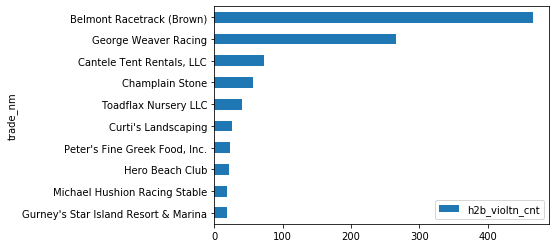

In [15]:
ax = df_NY_h2b.head(10).plot.barh(x='trade_nm', y='h2b_violtn_cnt').invert_yaxis()

### (5) Total penalties : 1,046,480 dollars
Note: the amount is not only limited to penalties on H1A, H1B, H2A and H2B violations for the top employers.

In [16]:
#H1B top employers' penalities
P_h1b = sum(df_NY_h1b.head(10).cmp_assd_cnt)
P_h1b

450760.5

In [17]:
#H2A top employers' penalities
P_h2a = sum(df_NY_h2a.head(10).cmp_assd_cnt)
P_h2a

138575.4

In [18]:
#H2B top employers' penalities
P_h2b = sum(df_NY_h2b.head(10).cmp_assd_cnt)
P_h2b

457144.17

In [19]:
P = P_h1b + P_h2a + P_h2b
P

1046480.0700000001

## 2. Find out how New York state employers compare to other states across the nation for total number of H1A, H1B, H2A and H2B-related violations. 

### New York has 7,372 in total violations on H1A, H1B, H2A and H2, ranking No.5 among all states.

In [20]:
# Add an extra column of total number of H1A, H1B, H2A and H2B-related violations of each employer
df['total_num'] = df.h1a_violtn_cnt + df.h1b_violtn_cnt + df.h2a_violtn_cnt + df.h2b_violtn_cnt

In [21]:
#Group the dataset by state and get the sum of total number of violations for each state
df_state = pd.DataFrame(df.groupby('st_cd')['total_num'].aggregate('sum'))
#Rank the state from most to least by number of violations
df_state.sort_values(by='total_num', ascending=False).reset_index()

,st_cd,total_num
0,FL,18621
1,CA,16815
2,VA,8107
3,MS,7455
4,NY,7372
5,TX,6839
6,NJ,5531
7,AZ,5414
8,IL,5409
9,MI,5197
